In [1]:
import matplotlib.pyplot as plt
import params as prm
import pandas as pd
import numpy as np
import os

In [2]:
focus = []
for file in os.listdir(prm.results_path):
    if file[:8] == "D1_focus":
        focus.append(file)

In [3]:
Matrice = []
for foc in focus:
    print(foc)
    path = os.path.join(prm.results_path, foc)
    Matrice.append(np.load(os.path.join(path, os.listdir(path)[-3])))

D1_focus_ENS_RN_6
D1_focus_LR_RN_9
D1_focus_UG_RN_8


In [6]:
df_1f = pd.read_csv(os.path.join(prm.datasets_pp_path, f"DF_{prm.dataset_1er_tour}.csv"))
df_2f = pd.read_csv(os.path.join(prm.datasets_pp_path, f"DF_{prm.dataset_2nd_tour}.csv"))

In [7]:
Nuances_1er_tour = df_1f.keys()[:-1]
Nuances_2nd_tour = df_2f.keys()[:-1]

In [9]:
import matplotlib.pyplot as plt

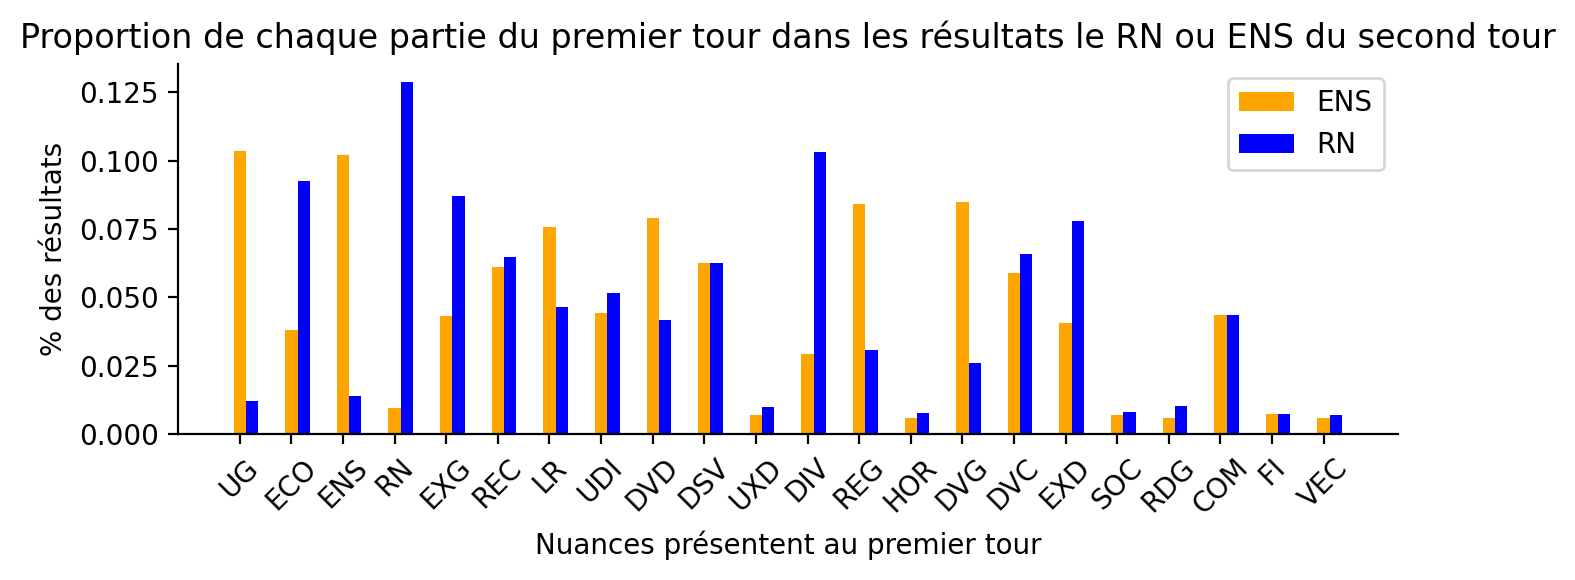

In [68]:
M_ENS_RN = np.concatenate([Matrice[0][:,:1], Matrice[0][:,2:3]], axis=1)
M_ENS_RN_norm = M_ENS_RN / M_ENS_RN.sum(axis=0)

fig,ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,3),
    dpi=200
)
ff = ["ENS","RN"]
colors = ["orange","blue"]
width = 0.25  # the width of the bars
offset = 0

for i in range(M_ENS_RN.shape[-1]):
    
    ax.bar(
        x = np.linspace(0, M_ENS_RN_norm.shape[0], M_ENS_RN_norm.shape[0]) + offset,
        height = M_ENS_RN_norm[:,i],
        width = width,
        color=colors[i],
        label = ff[i]
        )
    offset += width

ax.legend()
ax.set_xticks(
    np.linspace(0, M_ENS_RN_norm.shape[0], M_ENS_RN_norm.shape[0]),
    Nuances_1er_tour,
    rotation=45   
)
ax.spines[["top","right"]].set_visible(False)
ax.set_title("Proportion de chaque partie du premier tour dans les résultats le RN ou ENS du second tour")
ax.set_xlabel("Nuances présentent au premier tour")
ax.set_ylabel("% des résultats")
plt.tight_layout()
plt.savefig(os.path.join(prm.figures_path, "Focus_ENS_RN.pdf"), dpi=200)
plt.show()

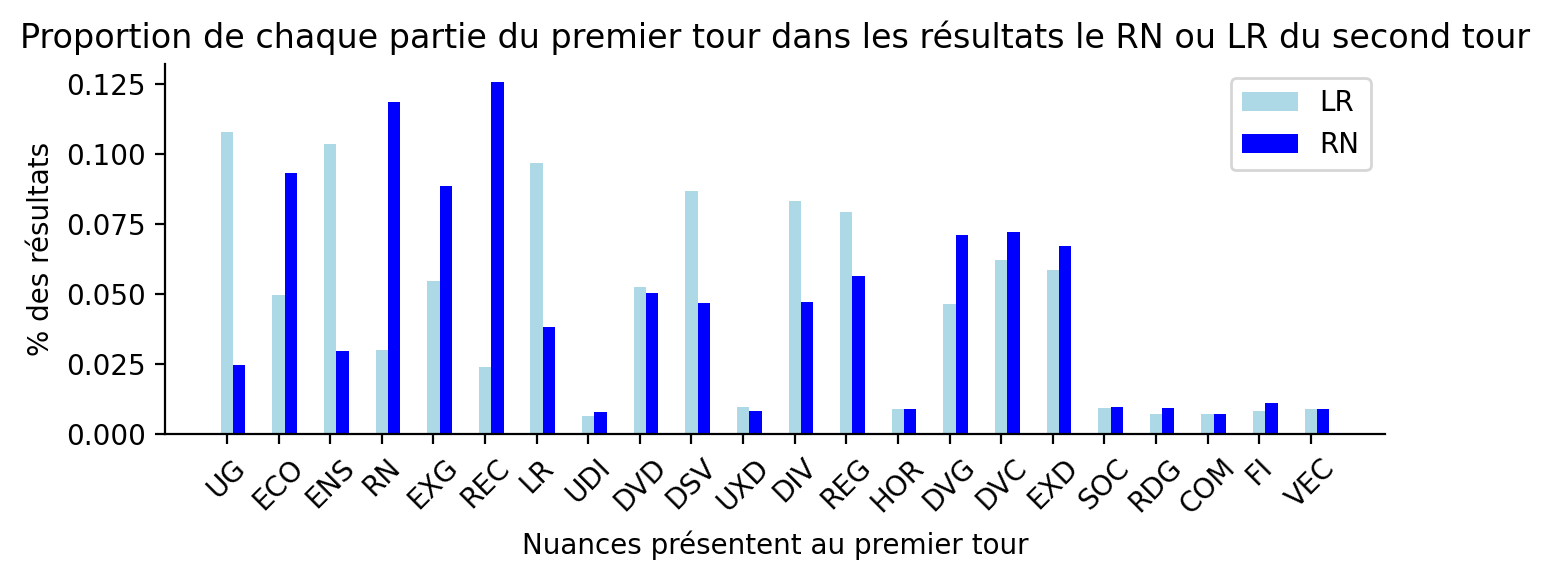

In [69]:
M_LR_RN = np.concatenate([Matrice[1][:,3:4], Matrice[1][:,2:3]], axis=1)
M_LR_RN_norm = M_LR_RN / M_LR_RN.sum(axis=0)

fig,ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,3),
    dpi=200
)
ff = ["LR","RN"]
colors = ["lightblue","blue"]
width = 0.25  # the width of the bars
offset = 0

for i in range(M_ENS_RN.shape[-1]):
    
    ax.bar(
        x = np.linspace(0, M_LR_RN.shape[0], M_LR_RN.shape[0]) + offset,
        height = M_LR_RN_norm[:,i],
        width = width,
        color=colors[i],
        label = ff[i]
        )
    offset += width

ax.legend()
ax.set_xticks(
    np.linspace(0, M_LR_RN.shape[0], M_LR_RN.shape[0]),
    Nuances_1er_tour,
    rotation=45
)
ax.spines[["top","right"]].set_visible(False)
ax.set_title("Proportion de chaque partie du premier tour dans les résultats le RN ou LR du second tour")
ax.set_xlabel("Nuances présentent au premier tour")
ax.set_ylabel("% des résultats")
plt.tight_layout()
plt.savefig(os.path.join(prm.figures_path, "Focus_LR_RN.pdf"), dpi=200)
plt.show()

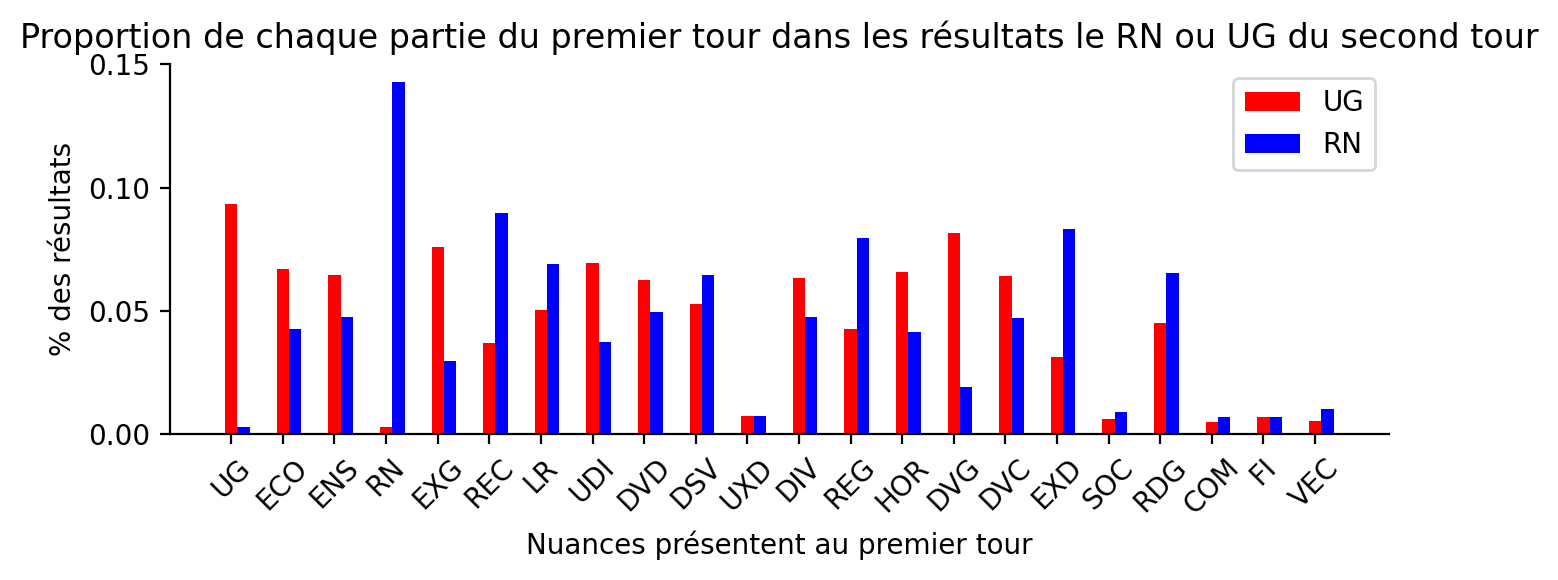

In [73]:
M_UG_RN = np.concatenate([Matrice[2][:,1:2], Matrice[2][:,2:3]], axis=1)
M_UG_RN_norm = M_UG_RN / M_UG_RN.sum(axis=0)

fig,ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,3),
    dpi=200
)
ff = ["UG","RN"]
colors = ["red","blue"]
width = 0.25  # the width of the bars
offset = 0

for i in range(M_UG_RN.shape[-1]):
    
    ax.bar(
        x = np.linspace(0, M_UG_RN.shape[0], M_UG_RN.shape[0]) + offset,
        height = M_UG_RN_norm[:,i],
        width = width,
        color=colors[i],
        label = ff[i]
        )
    offset += width

ax.legend()
ax.set_xticks(
    np.linspace(0, M_UG_RN.shape[0], M_UG_RN.shape[0]),
    Nuances_1er_tour,
    rotation=45  
)
ax.spines[["top","right"]].set_visible(False)
ax.set_title("Proportion de chaque partie du premier tour dans les résultats le RN ou UG du second tour")
ax.set_xlabel("Nuances présentent au premier tour")
ax.set_ylabel("% des résultats")
plt.tight_layout()
plt.savefig(os.path.join(prm.figures_path, "Focus_UG_RN.pdf"), dpi=200)
plt.show()